1. Carga de datos:
  – Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.


In [5]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv("../Data/winequality-red.csv")
# Visualización inicial
data.head(10).T



,0,1,2,3,4,5,6,7,8,9
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed acidity          1599 non-null   float64
 1   volatile acidity       1599 non-null   float64
 2   citric acid            1599 non-null   float64
 3   residual sugar         1599 non-null   float64
 4   chlorides              1599 non-null   float64
 5   free sulfur dioxide    1599 non-null   float64
 6   total sulfur dioxide   1599 non-null   float64
 7   density                1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulphates              1599 non-null   float64
 10  alcohol                1599 non-null   float64
 11  quality                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


2. Exploración y preprocesamiento de datos:
  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

In [7]:
print(data.isnull().sum())


fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


In [8]:
print(data.describe())

       fixed acidity   volatile acidity   citric acid   residual sugar   \
count     1599.000000        1599.000000   1599.000000      1599.000000   
mean         8.319637           0.527821      0.270976         2.538806   
std          1.741096           0.179060      0.194801         1.409928   
min          4.600000           0.120000      0.000000         0.900000   
25%          7.100000           0.390000      0.090000         1.900000   
50%          7.900000           0.520000      0.260000         2.200000   
75%          9.200000           0.640000      0.420000         2.600000   
max         15.900000           1.580000      1.000000        15.500000   

       chlorides              free sulfur dioxide   total sulfur dioxide   \
count            1599.000000           1599.000000            1599.000000   
mean                0.087467             15.874922              46.467792   
std                 0.047065             10.460157              32.895324   
min             

In [12]:
from sklearn.preprocessing import StandardScaler

# Selección de características (excluyendo la calidad)
features = data.drop("quality", axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


3. Aplicación de PCA:
  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
  – Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

In [13]:
from sklearn.decomposition import PCA

# Inicializar PCA
pca = PCA()
pca.fit(features_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("Varianza explicada acumulada:", cumulative_variance)


Varianza explicada acumulada: [0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


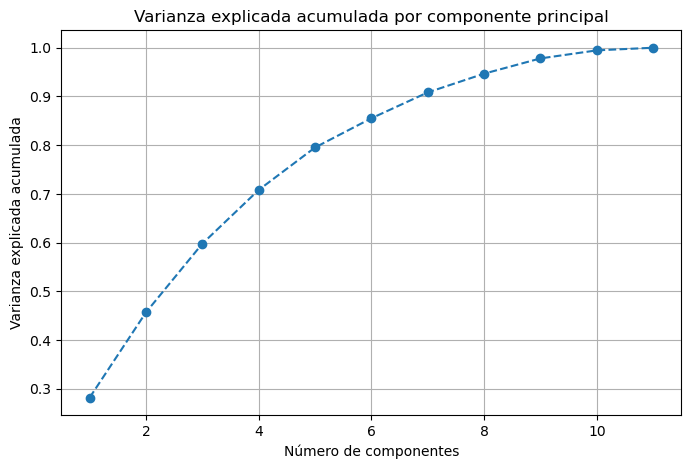

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componente principal')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()


4. Interpretación de los componentes principales:
  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

In [15]:
import numpy as np

# Componentes principales
components = pca.components_
feature_names = features.columns
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    print(sorted(zip(feature_names, np.abs(component)), key=lambda x: x[1], reverse=True))


Componente 1:
[('fixed acidity ', 0.48931421519698964), ('citric acid ', 0.4636316563349594), ('pH   ', 0.43851962406531014), ('density            ', 0.3953530087684557), ('sulphates ', 0.242921330947971), ('volatile acidity ', 0.23858436259729654), ('chlorides            ', 0.21224658194703183), ('residual sugar ', 0.1461071535855692), ('alcohol            ', 0.11323206499477256), ('free sulfur dioxide ', 0.03615752441040852), ('total sulfur dioxide ', 0.023574853564112735)]
Componente 2:
[('total sulfur dioxide ', 0.5694869591039708), ('free sulfur dioxide ', 0.5135668118526766), ('alcohol            ', 0.3861809593562072), ('volatile acidity ', 0.2749304804650772), ('residual sugar ', 0.27208023847178797), ('density            ', 0.2335754898738303), ('citric acid ', 0.15179135552456066), ('chlorides            ', 0.1480515552868173), ('fixed acidity ', 0.11050273795859254), ('sulphates ', 0.03755391603758412), ('pH   ', 0.006710792677070199)]
Componente 3:
[('alcohol            ', 

5. Visualización y comparación:
  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

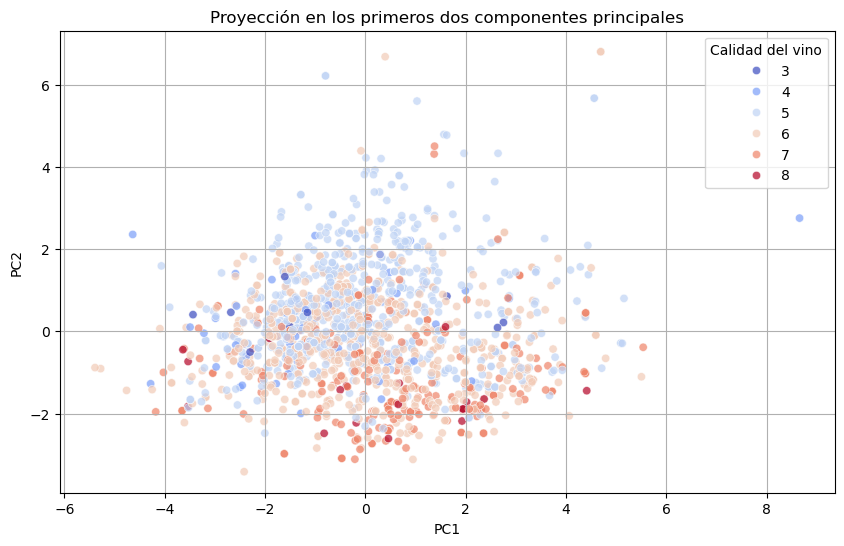

In [16]:
# Reducir a 2 componentes
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(features_scaled)

# Agregar las etiquetas de calidad
data['PC1'] = components_2d[:, 0]
data['PC2'] = components_2d[:, 1]

# Gráfico de dispersión
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=data, palette='coolwarm', alpha=0.7)
plt.title('Proyección en los primeros dos componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Calidad del vino')
plt.grid()
plt.show()


Este gráfico ayuda a visualizar cómo aumenta la proporción de variabilidad capturada a medida que se agregan más componentes principales. Un punto clave es determinar cuántos componentes son necesarios para explicar al menos el 90% de la variabilidad.

In [17]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Número de componentes necesarios para explicar el 90% de la varianza: {n_components_90}")

Número de componentes necesarios para explicar el 90% de la varianza: 7


Las primeras componentes suelen estar dominadas por variables que capturan la mayor variabilidad en los datos.

In [18]:
feature_importance = sorted(zip(feature_names, np.abs(pca.components_[0])), key=lambda x: x[1], reverse=True)
print("Variables más importantes en el primer componente:", feature_importance[:5])


Variables más importantes en el primer componente: [('fixed acidity ', 0.48931421519698964), ('citric acid ', 0.4636316563349594), ('pH   ', 0.43851962406531014), ('density            ', 0.3953530087684557), ('sulphates ', 0.242921330947971)]


El uso de PCA no solo simplifica el dataset al capturar la mayor variabilidad con menos componentes, sino que también mejora la eficiencia y rendimiento de los modelos de machine learning al eliminar características irrelevantes y redundantes. La interpretación de los componentes principales permite identificar las variables más influyentes, ayudando a centrar el análisis en los factores clave que afectan la calidad del vino.